In [31]:
import os
import nltk
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('twitter_training.csv', header=None)

In [33]:
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [34]:
data = df.iloc[:, 2:]

In [35]:
data.rename(columns={2: 'rev', 3:'tweet'}, inplace=True)

In [36]:
data.head()

,rev,tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mukesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mukesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
import string
import re
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mukesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rev     74682 non-null  object
 1   tweet   73996 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [44]:
data['tweet'] = data['tweet'].astype('str')

In [45]:
data['tweet'] = data['tweet'].apply(lambda x: x.lower())
data['tweet'] = data['tweet'].apply(lambda x: " ".join([lemma.lemmatize(word, pos='v') for word in x.split()]))
data['tweet'] = data['tweet'].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords]))
data['tweet'] = data['tweet'].apply(lambda x: " ".join([word for word in x.split() if word not in punct]))
data['tweet'] = data['tweet'].apply(lambda x: " ".join([re.sub(r'[0-9\.]+', '', word) for word in x.split()]))

In [46]:
data

,rev,tweet
0,Positive,im get borderlands murder
1,Positive,"come border kill all,"
2,Positive,"im get borderlands kill all,"
3,Positive,"im come borderlands murder all,"
4,Positive,"im get borderlands murder all,"
...,...,...
74677,Positive,realize windows partition mac like years behi...
74678,Positive,realize mac window partition years behind nvi...
74679,Positive,realize windows partition mac years behind nv...
74680,Positive,realize windows partition mac like years behi...


In [47]:
X = data['tweet']
y = data['rev']

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
vectorizer = TfidfVectorizer()

In [50]:
X_vec = vectorizer.fit_transform(X)

In [51]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_vec, y)

MultinomialNB()

In [52]:
test_df = pd.read_csv('twitter_validation.csv', header=None)

In [53]:
test_df.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [54]:
test_data = test_df.iloc[:, 2:]
test_data.rename(columns={2: 'rev', 3:'tweet'}, inplace=True)
test_data['tweet'] = test_data['tweet'].astype('str')
test_data['tweet'] = test_data['tweet'].apply(lambda x: x.lower())
test_data['tweet'] = test_data['tweet'].apply(lambda x: " ".join([lemma.lemmatize(word, pos='v') for word in x.split()]))
test_data['tweet'] = test_data['tweet'].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords]))
test_data['tweet'] = test_data['tweet'].apply(lambda x: " ".join([word for word in x.split() if word not in punct]))
test_data['tweet'] = test_data['tweet'].apply(lambda x: " ".join([re.sub(r'[0-9\.]+', '', word) for word in x.split()]))
X_test = test_data['tweet']
y_test = test_data['rev']
X_test_vec = vectorizer.transform(X_test)

In [55]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [56]:
def report(model):
    preds = model.predict(X_test_vec)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_vec,y_test)

              precision    recall  f1-score   support

  Irrelevant       0.97      0.62      0.76       172
    Negative       0.71      0.92      0.80       266
     Neutral       0.91      0.75      0.82       285
    Positive       0.80      0.89      0.84       277

    accuracy                           0.81      1000
   macro avg       0.85      0.80      0.81      1000
weighted avg       0.84      0.81      0.81      1000



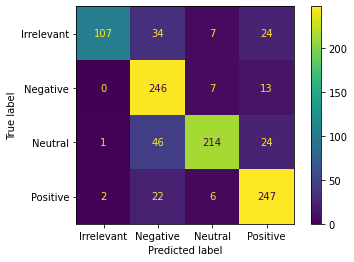

In [57]:
report(nb)

In [60]:
from joblib import dump, load
model = dump(nb, 'model.pkl')
vectorizer = dump(vectorizer, 'vectorizer.pkl')